In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from scipy import interpolate
import scipy.integrate
from ww32seismo import *
import seaborn as sns

# Read the observed displacement RMS from the observed data and remove the earthquakes

In [15]:
seis = pd.read_pickle("DATA/BE.UCC..HHZ.pkl") # Read observed data
seis.columns = ["Observed"] # Get same index as model
seis = seis.resample("180T").mean()
EQs = ["2021-10-02 06:00:00", "2021-10-11 09:00:00", "2021-10-12 09:00:00"]
for EQ in EQs:
    seis.loc[EQ]=np.NaN

In [ ]:
stations = ["UCC"]
misfits = []
corrs = []

for sta in stations:
    Qs = np.linspace(150,500,36)
    #read DataFrame from pickle file
    for Q in Qs:
        print(int(Q))
        df= pd.read_pickle("DATA/Q/{}_Q{}.pkl".format(sta, int(Q)))
        
        plot_spec(df, sta, Q)
        
        integ = np.sqrt(scipy.integrate.trapz(df.fillna(0), df.index, axis=0))
        model = pd.DataFrame(integ, index = df.columns)
        model.columns = ["Modeled"]
        pair = seis.merge(model, left_index=True, right_index=True)
        
        pair.plot(title="{}, Q={}".format(sta, int(Q)))
        sns.pairplot(pair)
        
        misfit = get_misfit(pair["Observed"], pair["Modeled"])
        misfits.append(misfit)
        corr = get_corr(pair["Observed"], pair["Modeled"])
        corrs.append(corr)
        
        sns.heatmap(pair.corr(), annot= True)
#        idx = seis.index.isin(df.columns)

# Look for the best Q for the station

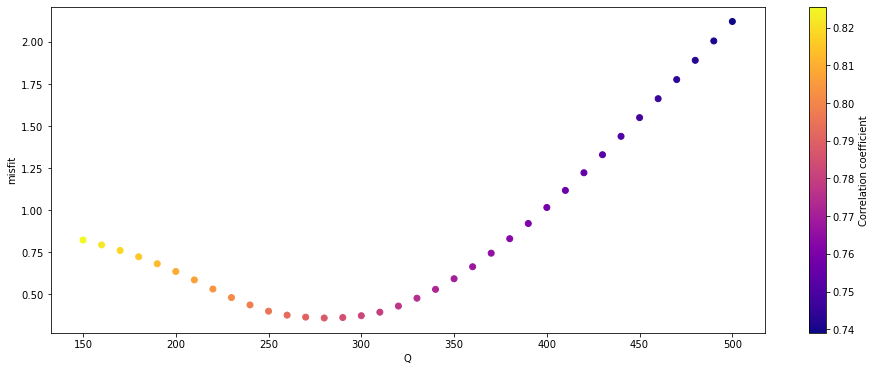

In [17]:
fig = plt.figure()
plt.scatter(Qs,misfits, c=corrs, cmap="plasma")
plt.colorbar().set_label("Correlation coefficient")
plt.xlabel("Q")
plt.ylabel("misfit")
plt.show()